<a href="https://colab.research.google.com/github/zzhining/public_data_analysis/blob/main/w05_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 05. 공공데이터를 활용한 데이터 시각화(2)

## 실습 목표
---
- pyplot을 활용한 데이터 시각화
    - 월평균 소득 분표
    - 전공별 월평균소득의 분포
    - 주당 정규 근로 시간에 따른 월평균 소득의 분포
    - 월평균 근로소득에 영향을 미치는 변수

## 데이터
---

* [고용조사분석시스템](https://survey.keis.or.kr/goms/gomsdownload/List.jsp)

- 대졸자들의 노동시장 진입과 정착 과정에 대한 실증적 자료가 요구됨에 따라  『대졸자직업이동경로조사』를 실시
- 대졸자의 교육과정, 구직활동, 일자리경험, 직업훈련, 자격증, 개인신상정보 및 가계배경 등 노동시장 진입 및 정착에 영향을 줄 수 있는 항목 조사
- GOMS2019.csv
    - shape: (11652, 130)
- GOMS2019_columns.csv
    - shape: (159, 3)


## 0. 환경셋팅
-----
한글 지원이 안되는 문제를 해결하기 위해 한글이 지원되는 폰트를 사용하도록 설정합니다.

In [1]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 1. 데이터 읽기
---



### 1.1 라이브러리 불러오기
- **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
- **pandas**: 데이터프레임을 다루기 위한 라이브러리
- **seaborn**: 데이터 시각화(highlevel)를 위한 라이브러리
- **matplotlib**:데이터 시각화(lowlevel)를 위한 라이브러리
- **ploly**: 동적 시각화를 위한 라이브러리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1.2 데이터 불러오기
---
pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

In [3]:
# GOMS2019.csv 파일을 읽어오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019.csv')
df_columns = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019_columns.csv')

# 데이터프레임의 상위 5개 항목 출력
df.shape, df_columns.shape

((11652, 130), (159, 3))

### 1.3 데이터 전처리
----
데이터프레임 `df`의 컬럼명을 변경합니다.

In [4]:
df.columns

Index(['이직여부', 'majorcat', 'school', 'area', 'sex', 'age', 'graduy', 'a001',
       'industry', 'job',
       ...
       'p039', 'p041', 'p043', 'p045', 'r023', 'r024', 'r025', 'r026', 'r027',
       'wt'],
      dtype='object', length=130)

In [5]:
col_name = df_columns.loc[:, ['columns', 'desc']].values
df.rename(columns = dict(col_name), inplace = True)

In [6]:
df.columns

Index(['이직여부', '전공계열', '학교유형', '학교소재지', '성별', '연령', '졸업년', '현 일자리 시작년', '21',
       '10',
       ...
       '지난 해 소득_만원', '가족에게 경제적 지원을 받고 있는지 여부', '가족에게 경제적 지원을 하고 있는지 여부',
       '군 복무 경험', '전년도 월평균 생활비 지출액', '전년도 월평균 주거비 지출액', '전년도 월평균 공교육비 지출액',
       '전년도 월평균 사교육비 지출액', '생활비 충당 방식', 'wt'],
      dtype='object', length=130)

## 2. 데이터 시각화
----

In [7]:
# Matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

### 2.1 월평균 근로소득 분포
---
seaborn의 히스토그램

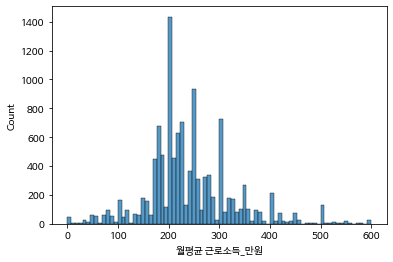

In [8]:
df_salary = df[df['월평균 근로소득_만원']<= 600]
sns.histplot(df_salary['월평균 근로소득_만원'])

plotly.express의 히스토그램

In [9]:
px.histogram(x=df_salary['월평균 근로소득_만원'])

In [10]:
px.histogram(x=df_salary['월평균 근로소득_만원'],
                   template="plotly_dark", 
                   text_auto=True, 
                   title= "전공별 월평균 소득")

### 2.2 전공계열에 따른 월평균 근로소득 분포
plotly.express의 바이올린플롯

In [11]:
px.violin(df, x = '전공계열', y = '월평균 근로소득_만원', template="plotly_dark")

바이올린 플롯의 색상 지정

In [12]:
colors =["#FF0000", "#1DDB16", "#FFBB00", "#0100FF", "#8324FF", "#2ECCFA", "#FFCCFA"]
px.violin(df, x = '전공계열', y = '월평균 근로소득_만원', color_discrete_sequence=colors, color='전공계열', template="plotly_dark")

### 2.3 주당 정규 근로시간에 따른 월평균 근로소득 분포

plotly.express의 산점도

In [18]:
px.scatter(df, x = '주당 정규 근로시간', y = '월평균 근로소득_만원', template="plotly_dark")

### 2.4 월평균 근로소득에 영향을 미치는 변수
3D 산점도

In [14]:
fig = px.scatter_3d(df, x='전공계열', y='학교소재지', z='월평균 근로소득_만원',  color='전공계열', 
              color_discrete_sequence= colors, opacity=0.7, template="plotly_dark" )
fig.update_layout(height = 700, width = 800, hovermode = 'closest') 

In [15]:
df.columns

Index(['이직여부', '전공계열', '학교유형', '학교소재지', '성별', '연령', '졸업년', '현 일자리 시작년', '21',
       '10',
       ...
       '지난 해 소득_만원', '가족에게 경제적 지원을 받고 있는지 여부', '가족에게 경제적 지원을 하고 있는지 여부',
       '군 복무 경험', '전년도 월평균 생활비 지출액', '전년도 월평균 주거비 지출액', '전년도 월평균 공교육비 지출액',
       '전년도 월평균 사교육비 지출액', '생활비 충당 방식', 'wt'],
      dtype='object', length=130)